# <span style="font-family:verdana"> Predicting Insurance Claim 

***

## <span style="font-family:verdana"> <span style="color:green"> Using sample data set of historical insurance claims to develop a model for Insurance claim prediction. 

In [1]:
import pandas as pd 

#loading the data set 

df = pd.read_csv('./insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


### <span style="font-family:verdana"> <span style="color:green">Data Preprocessing

In [2]:
df.shape

(1338, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


### <span style="font-family:verdana"> <span style="color:green">Exploratory Data Analysis(EDA)

C:\Users\SatyendraSingh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


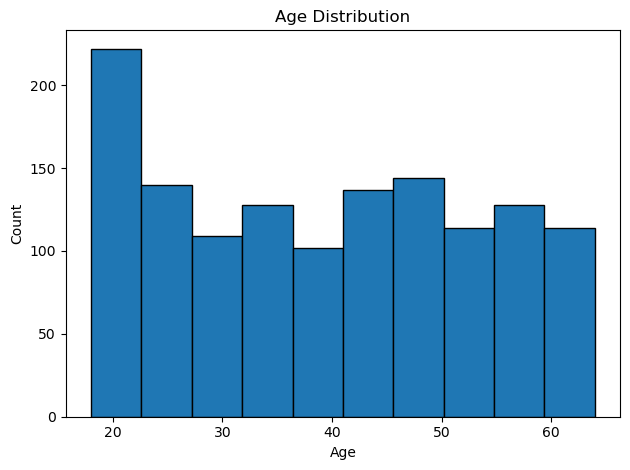

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(df['age'], edgecolor='black')
plt.tight_layout()
plt.show()

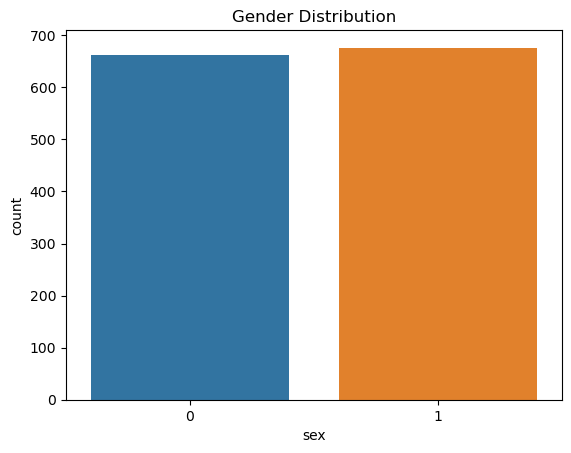

In [6]:
plt.title('Gender Distribution')
sns.countplot(x= 'sex', data= df)
plt.show()

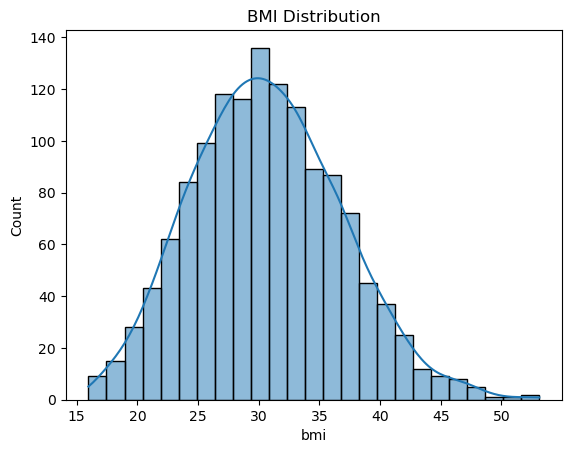

In [7]:
plt.title ('BMI Distribution')
sns.histplot(df['bmi'],kde = True)
plt.show()

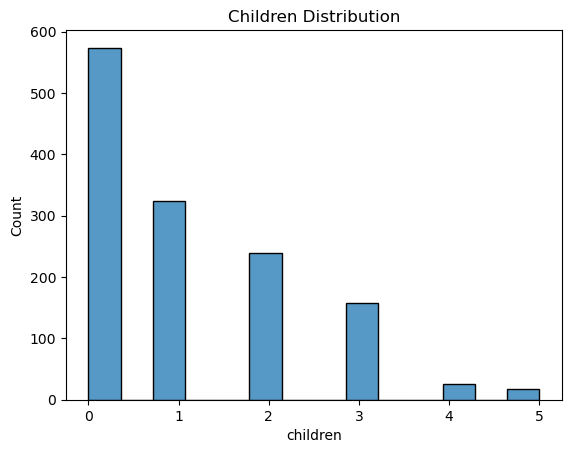

In [8]:
plt.title('Children Distribution')
sns.histplot(df.children)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

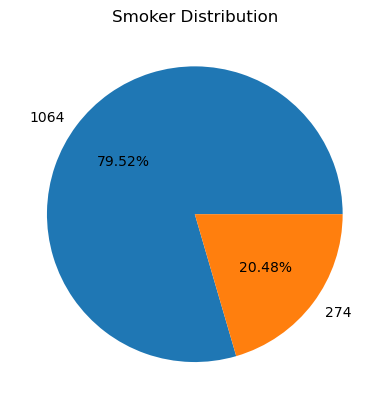

In [9]:
plt.title('Smoker Distribution')
plt.pie(df.smoker.value_counts(),labels= df.smoker.value_counts(),autopct='%.2f%%')
plt.show

### <span style="font-family:verdana"> <span style="color:green">Correlation Matrix

In [10]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

### <span style="font-family:verdana"> <span style="color:green">Spliting the data into training and test data

In [12]:
#plotting the data in x and y
y = df['insuranceclaim']
X = df.drop( ['insuranceclaim'],axis=1)

#train test split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)


### <span style="font-family:verdana"> <span style="color:green">Baseline Model

In [13]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.5373134328358209

### <span style="font-family:verdana"> <span style="color:green"> Logistic Regression

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
lr_acc_score = accuracy_score(y_test,y_pred_log)
lr_f1_score = f1_score(y_test,y_pred_log)
lr_conf_matrix = confusion_matrix(y_test,y_pred_log)

##Print
print(f"Test Accuracy score : {lr_acc_score}")
print(f"Test F1 : {lr_f1_score}")
print('\n')
print("Confusion matrix")
print(lr_conf_matrix)

print(classification_report(y_test, y_pred_log))


Test Accuracy score : 0.7885572139303483
Test F1 : 0.8232848232848233


Confusion matrix
[[119  48]
 [ 37 198]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       167
           1       0.80      0.84      0.82       235

    accuracy                           0.79       402
   macro avg       0.78      0.78      0.78       402
weighted avg       0.79      0.79      0.79       402



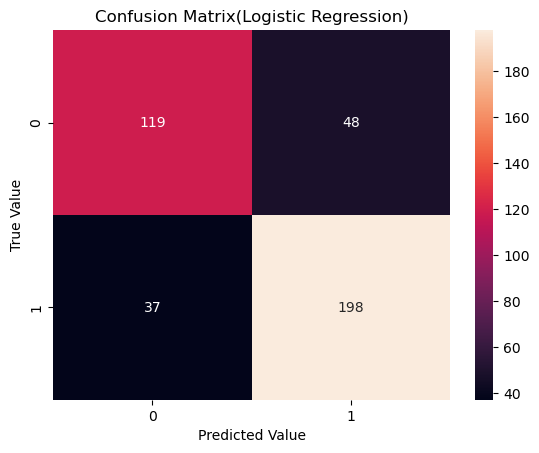

In [15]:
plt.title("Confusion Matrix(Logistic Regression)")
sns.heatmap(lr_conf_matrix,annot = True,fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

### <span style="font-family:verdana"> <span style="color:green">Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()
Tree.fit(X_train,y_train)
y_pred_Tree = Tree.predict(X_test)

Tree_acc_score = accuracy_score(y_test,y_pred_Tree)
Tree_f1_score = f1_score(y_test,y_pred_Tree)
Tree_conf_matrix = confusion_matrix(y_test,y_pred_Tree)
print(f"Test acc Score : {Tree_acc_score}")
print(f"Test F1 Score : {Tree_f1_score}")
print(Tree_conf_matrix)

print(classification_report(y_test, y_pred_Tree))

Test acc Score : 0.9676616915422885
Test F1 Score : 0.9721627408993575
[[162   5]
 [  8 227]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       167
           1       0.98      0.97      0.97       235

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402



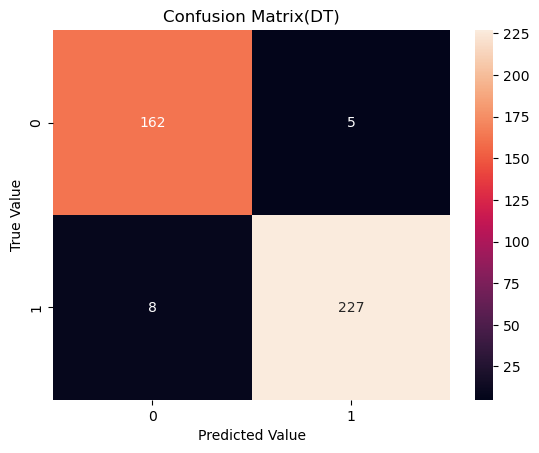

In [17]:
plt.title("Confusion Matrix(DT)")
sns.heatmap(Tree_conf_matrix,annot = True,fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

### <span style="font-family:verdana"> <span style="color:green">Naive Bayes


In [18]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred_NB = NB.predict(X_test)
NB_acc_score = accuracy_score(y_test,y_pred_NB)
NB_f1_score = f1_score(y_test,y_pred_NB)
NB_conf_matrix = confusion_matrix(y_test,y_pred_NB)
print(f"Test aCC score : {NB_acc_score}")
print(f"Test f1 SCORE : {NB_f1_score}")
print("Confusion matrix")
print(NB_conf_matrix)

print(classification_report(y_test, y_pred_NB))

Test aCC score : 0.763681592039801
Test f1 SCORE : 0.7642679900744417
Confusion matrix
[[153  14]
 [ 81 154]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       167
           1       0.92      0.66      0.76       235

    accuracy                           0.76       402
   macro avg       0.79      0.79      0.76       402
weighted avg       0.81      0.76      0.76       402



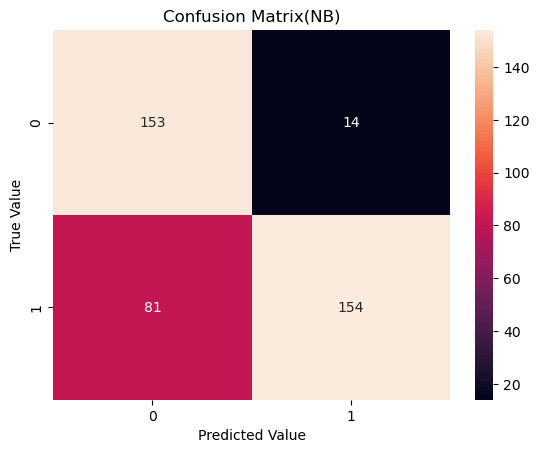

In [19]:
plt.title("Confusion Matrix(NB)")
sns.heatmap(NB_conf_matrix,annot = True,fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

### <span style="font-family:verdana"> <span style="color:green">Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_y_pred = RF.predict(X_test)

RF_acc_score = accuracy_score(y_test,RF_y_pred)
RF_f1_score = f1_score(y_test,RF_y_pred)
RF_Conf_Matrix = confusion_matrix(y_test,RF_y_pred)

print(f"Test aCC score : {RF_acc_score}")
print(f"Test f1 SCORE : {RF_f1_score}")
print("Confusion matrix")
print(RF_Conf_Matrix)

print(classification_report(y_test, RF_y_pred))

Test aCC score : 0.9527363184079602
Test f1 SCORE : 0.9587852494577007
Confusion matrix
[[162   5]
 [ 14 221]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       167
           1       0.98      0.94      0.96       235

    accuracy                           0.95       402
   macro avg       0.95      0.96      0.95       402
weighted avg       0.95      0.95      0.95       402



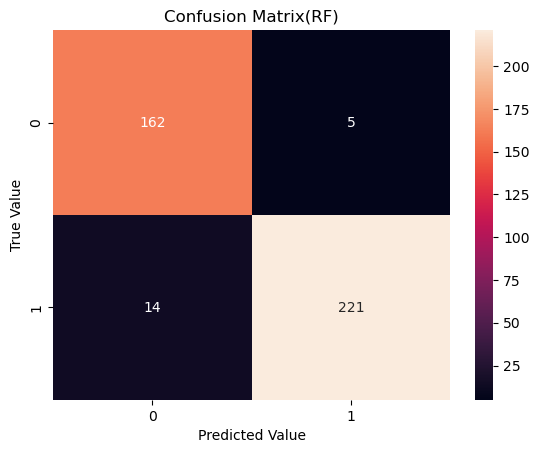

In [21]:
plt.title("Confusion Matrix(RF)")
sns.heatmap(RF_Conf_Matrix,annot = True,fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [22]:
model_perf = pd.DataFrame({'Model':['Dummy Classifer',"Logistic Regression","Decision Tree","Random Forest","Naive Byes"],
                          "Acuuracy":[dummy_clf.score(X_test, y_test),lr_acc_score,Tree_acc_score,RF_acc_score,NB_acc_score]})
model_perf

,Model,Acuuracy
0,Dummy Classifer,0.475124
1,Logistic Regression,0.788557
2,Decision Tree,0.967662
3,Random Forest,0.952736
4,Naive Byes,0.763682


### <span style="font-family:verdana"> <span style="color:blue">Conclusion: From all 5 classification model used for the input dataset, Decision Tree has the best Accuracy. 

### <span style="font-family:verdana"> <span style="color:green">Prediciting sample values 

In [23]:
## Predicting Couple of sample values a & b which are not part of Input Data Set 

a = [28,1,44,2,0,2,1600]
b = [64,1,53,3,1,3,3600]
y_pred_log = Tree.predict([a,b])
y_pred_log

C:\Users\SatyendraSingh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 1], dtype=int64)

### <span style="font-family:verdana"> <span style="color:blue">Conclusion : Sample values 'a' has predicted claim values as 0 whereas 'b' has 1.